In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow")
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)

In [2]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')

In [26]:
generation_data.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding
0,50550.813,0.0,0.0,0.0,0.0,0.0
1,50459.813,0.0,0.0,0.0,0.0,0.0
2,50199.313,0.0,0.0,0.0,0.0,0.0
3,49932.813,0.0,0.0,0.0,0.0,0.0
4,49679.313,0.0,0.0,0.0,0.0,0.0


In [4]:
storages_results["InstalledPowerInMW"].sum()

18000

<AxesSubplot:>

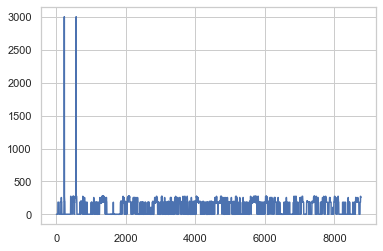

In [5]:
elec_prices_data["ElectricityPriceInEURperMWH"].plot()

In [6]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,50550.813,3.0,111769.60996
1,1,946083603,50459.813,3.0,108693.84996
2,1,946087203,50199.313,3.0,104494.34996
3,1,946090803,49932.813,3.0,99866.68996
4,1,946094403,49679.313,3.0,96235.06996


In [7]:
storage_levels_data.head()

,Unnamed: 0,value
0,20482600036,35500.0
1,20502600030,1500.0
2,20502600037,20000.0
3,20512600042,500.0
4,20512600043,500.0


In [31]:
storages_results

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20552600095,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
1,20552600096,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
2,20552600097,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
3,20552600098,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
4,20552600099,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
...,...,...,...,...,...,...,...,...,...,...,...
64,20512600048,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
65,20512600049,STORAGE,5,0.92,0.92,0,100,7.024017e+05,5.404950e+06,4875.050152,4.702548e+06
66,20502600030,STORAGE,5,0.92,0.92,0,300,2.107205e+06,1.621485e+07,14625.150456,1.410764e+07
67,20502600037,STORAGE,5,0.92,0.92,0,4000,2.809607e+07,2.161980e+08,195002.006084,1.881019e+08


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='value'>

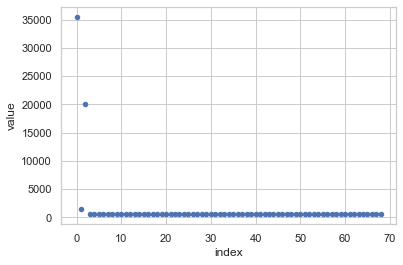

In [9]:
#storage_levels_data["value"][1:].plot.scatter() # 
storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')

In [33]:
production = storages_results['PRODUCTION_IN_MWH'].sum()
print(production)
discharging = generation_data["storages_discharging"].sum()
charging = generation_data["storages_discharging"].sum()
print(discharging)
production/discharging

#discharging/charging

877509.0273793662
4296377.869621714


0.20424391289787294

In [10]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True)
load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
load_generation.reset_index(inplace=True )
load_generation.drop("index", axis=1, inplace=True)

In [11]:
#load_generation.rename(columns={1: "load" }, inplace=True)
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)
load_generation.drop(1, axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,load_shedding
0,26418.75968,21659.05332,0.0,-0.0,0.0
1,30189.02968,17942.53332,0.0,-0.0,0.0
2,30458.38968,17762.42332,0.0,-0.0,0.0
3,23038.61968,25260.19332,0.0,-0.0,0.0
4,35158.01968,13160.04332,0.0,-0.0,0.0


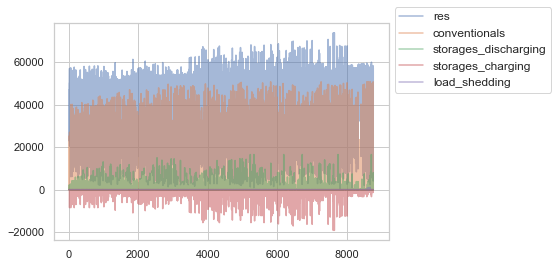

In [12]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

In [13]:
# plt.stackplot(load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_charging,
#               labels=['RES', 'conventional', "load shedding", "dish", "charg"])

In [14]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()

<AxesSubplot:>

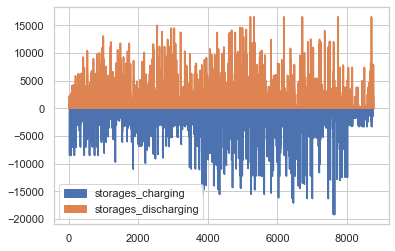

In [15]:
storages.plot.area()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


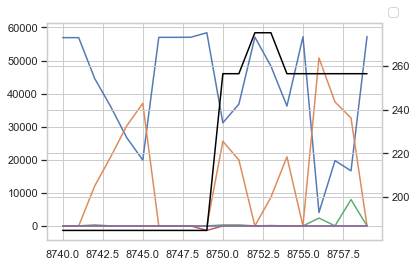

In [16]:
s = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#load_generation.iloc[8740:8760,0:5].plot( axis = , alpha=0.95)

ax1.plot(load_generation.iloc[8740:8760,0:5] , alpha=0.95)
ax2.plot(s.loc[8740:8760] , color = "black")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))


<AxesSubplot:>

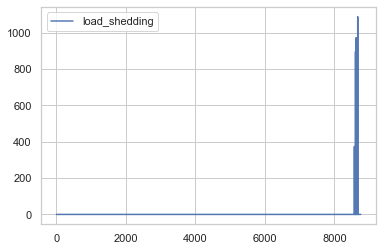

In [17]:
load_generation[["load_shedding"]].plot( alpha=0.95)

In [18]:
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,load_shedding
0,26418.75968,21659.05332,0.0,-0.0,0.0
1,30189.02968,17942.53332,0.0,-0.0,0.0
2,30458.38968,17762.42332,0.0,-0.0,0.0
3,23038.61968,25260.19332,0.0,-0.0,0.0
4,35158.01968,13160.04332,0.0,-0.0,0.0


In [19]:
conventionals_join.head()
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation


In [20]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,20552600095,STORAGE,5,0.92,0.92,0,100
1,20552600096,STORAGE,5,0.92,0.92,0,100
2,20552600097,STORAGE,5,0.92,0.92,0,100
3,20552600098,STORAGE,5,0.92,0.92,0,100
4,20552600099,STORAGE,5,0.92,0.92,0,100


In [21]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()
